# Explore here

1. Recopilación de datos 

In [9]:
# La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos

import pandas as pd

#Recopila los datos del archivo csv
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

#Lee las tablas 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#Se guarda archivo en ./data/raw

data.to_csv("../data/raw/Datos_Insurance.csv")

2. Exploración y limpieza de datos

In [11]:
#Obtener las dimensiones 
data.shape

#Tenemos 1338 filas con 7 columnas 

(1338, 7)

In [12]:
#Revisa los datos y sus tipos  
data.info()

#No existe NaN
#Datos Categoricos:sex, smoker, region
#Datos Numericos: age, bmi, children, charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# Revisar si existe duplicados y si es asi los elimina 

data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


In [14]:
#Se elimina datos irrelevante
data.drop(["region","children"], axis = 1, inplace = True)
data.head()

#Se elimina region y children(segun enunciado ya estan cubiertos por un seguro y se evalua solo datos fisiológicos de sus clientes )
#Nos quedamos con las siguientes: 
#   Datos Categoricos:sex, smoker
#   Datos Numericos: age, bmi, charges

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


3. Análisis de variables univariante

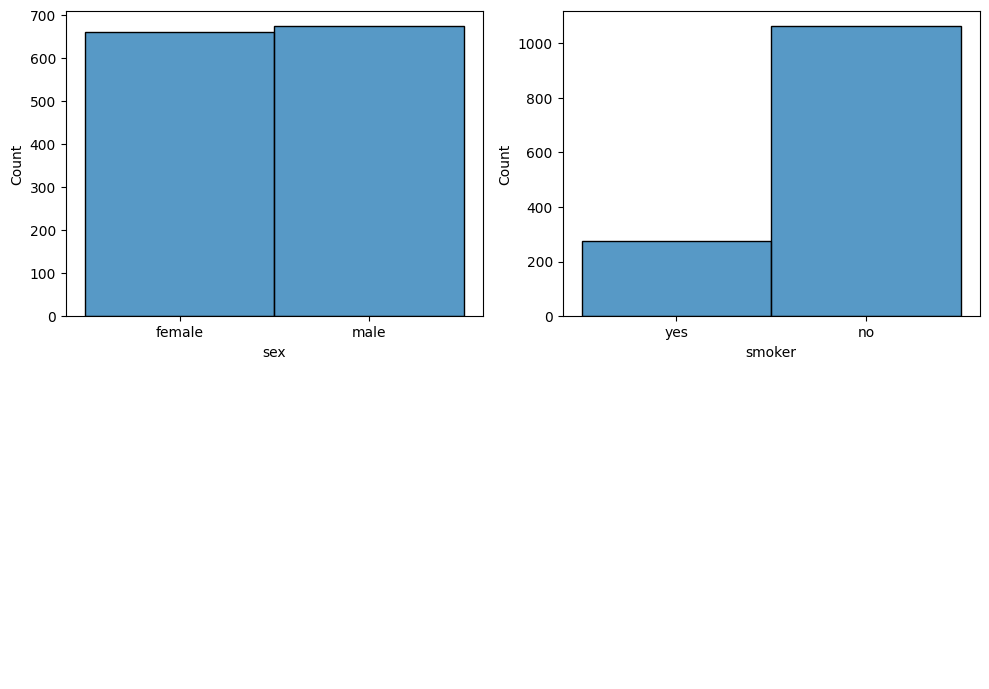

In [24]:
#Análisis sobre variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

#Datos Categoricos:sex, smoker

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "sex")
sns.histplot(ax = axis[0, 1], data = data, x = "smoker")

# Ocultar el último cuadrante vacío
axis[1, 0].axis('off')
axis[1, 1].axis('off')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

#se observa:
# Gran parte de los clientes no fuman 
# la diferencia entre la cantidad de male y female es muy baja . Sin embargo hay mas male

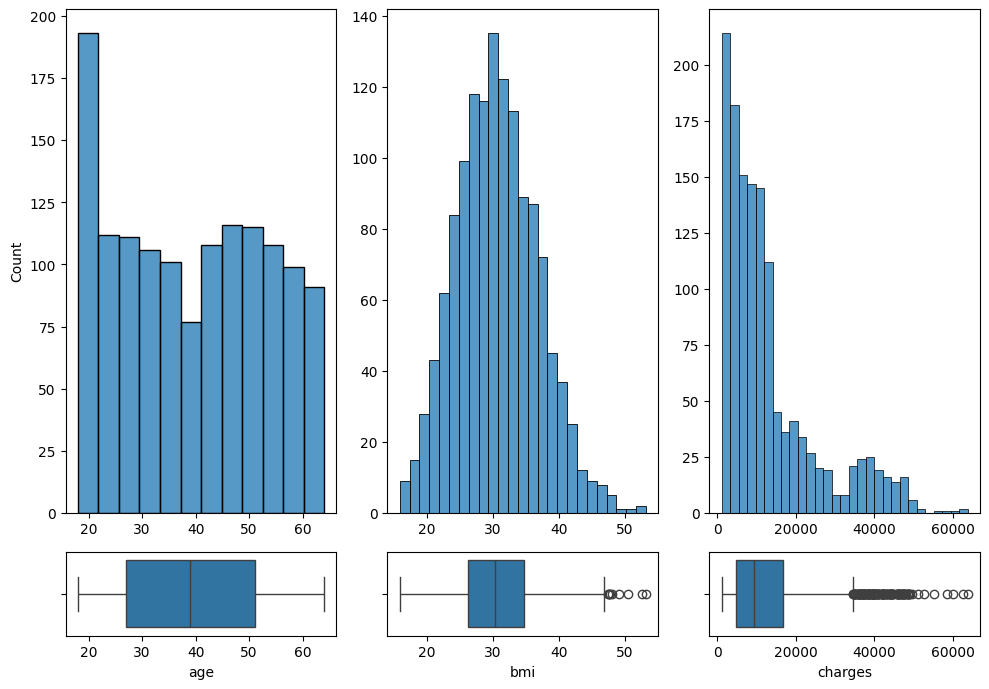

In [26]:
#Análisis sobre variables numéricas
#Datos Numericos: age, bmi, charges

fig, axis = plt.subplots(2, 3, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[0, 2], data = data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data, x = "charges")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

#Se observa:
# el bmi posee una distribucion normal , tiene pocos outliers
# charges posee una grafica asimetrica con varios datos dispersos 

4. Análisis de variables multivariadas

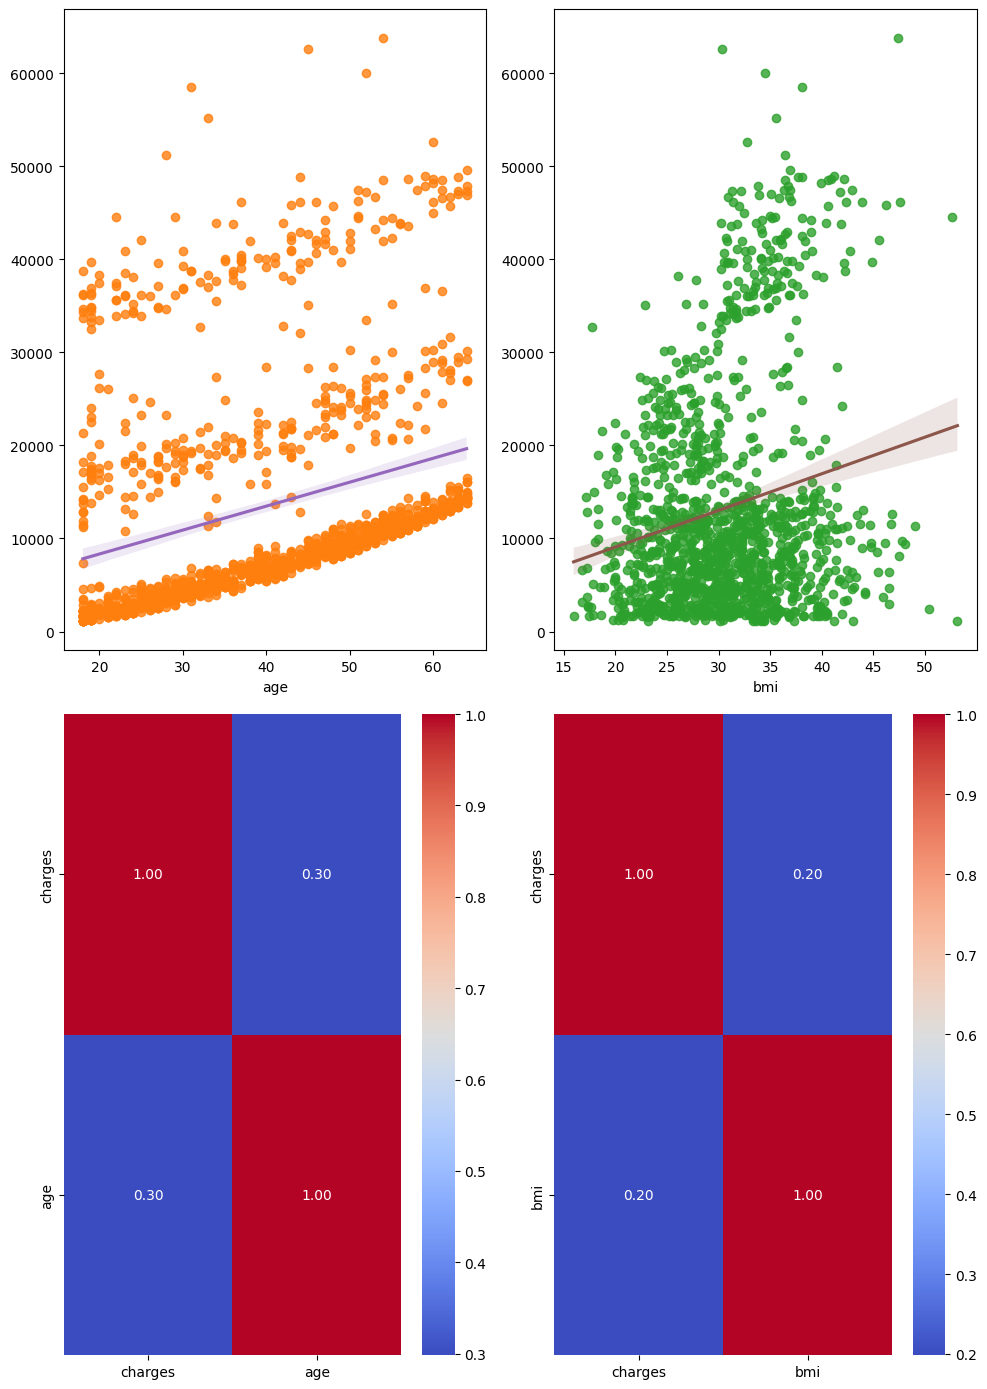

In [31]:
# Crear la figura y ejes (2 filas, 2 columnas)
fig, axis = plt.subplots(2, 2, figsize=(10, 14))

# Regplot para 'age' vs 'charges'
sns.regplot(ax=axis[0, 0], data=data, x="age", y="charges", 
            scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)

# Heatmap para la correlación entre 'age' y 'charges'
sns.heatmap(data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cmap='coolwarm')

# Regplot para 'bmi' vs 'charges'
sns.regplot(ax=axis[0, 1], data=data, x="bmi", y="charges", 
            scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#8c564b'}).set(ylabel=None)

# Heatmap para la correlación entre 'bmi' y 'charges'
sns.heatmap(data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cmap='coolwarm')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#Se observa:
# Se visualiza una relacion positiva moderada entre age y charges de un 0.30. Esto significa que, a medida que la edad de los pacientes aumenta, los cargos médicos tienden a incrementarse, aunque no de manera muy fuerte 
# Por otra parte , un coeficiente de 0.20 sugiere una relación positiva débil entre bmi y charges 


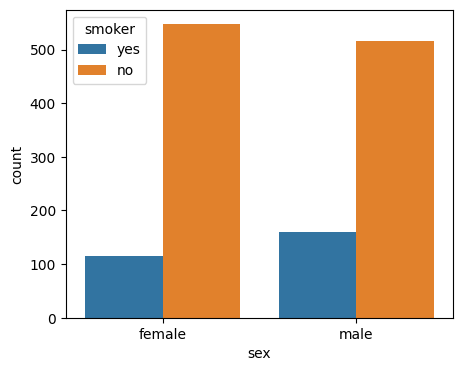

In [32]:
# Analisis categorico categorico 
#Datos Categoricos:sex, smoker

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data, x = "sex", hue = "smoker")

# Muestra el grafico 
plt.show()

#Se observa:
# Son muy poco los pasientes que fuman. Sin embargo se ve mayor cantidad en los hombres 

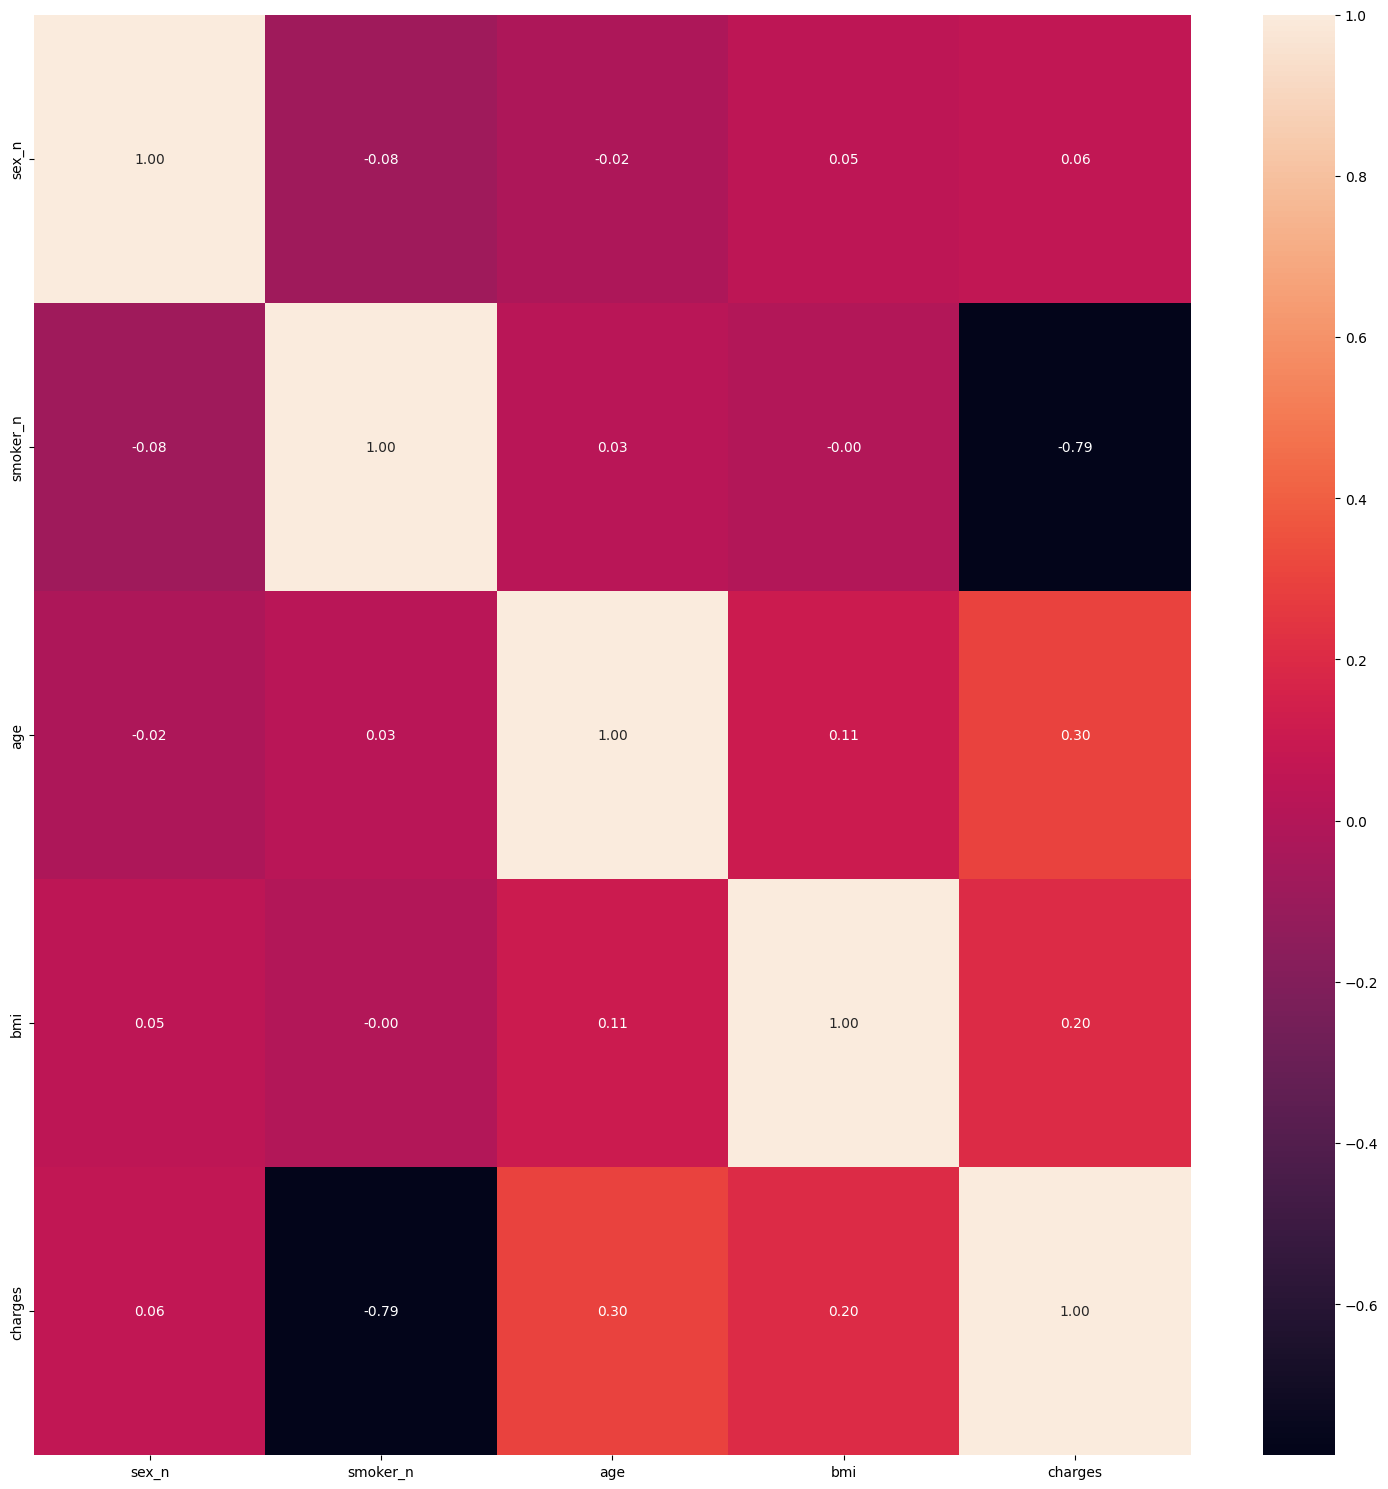

In [33]:
#Analisis numerico categorico 

#El objetivo del código es crear un heatmap de correlación que muestre la relación entre diferentes variables del dataset.

#Datos Categoricos:sex, smoker
#Datos Numericos: age, bmi, charges

# Factorizacion 
data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]


fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data[["sex_n", "smoker_n","age", "bmi", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Muestra el grafico
plt.show()

# Se obseva:
# Se observa uns correlacion negativa de -0.79 de smoker y charges  puede  indicar que el tabaquismo es un factor importante en el aumento de los costos médicos por ende la prima del seguro sera alta 
# Se visualiza una relacion positiva moderada entre age y charges de un 0.30. Esto significa que, a medida que la edad de los pacientes aumenta, los cargos médicos tienden a incrementarse, aunque no de manera muy fuerte 



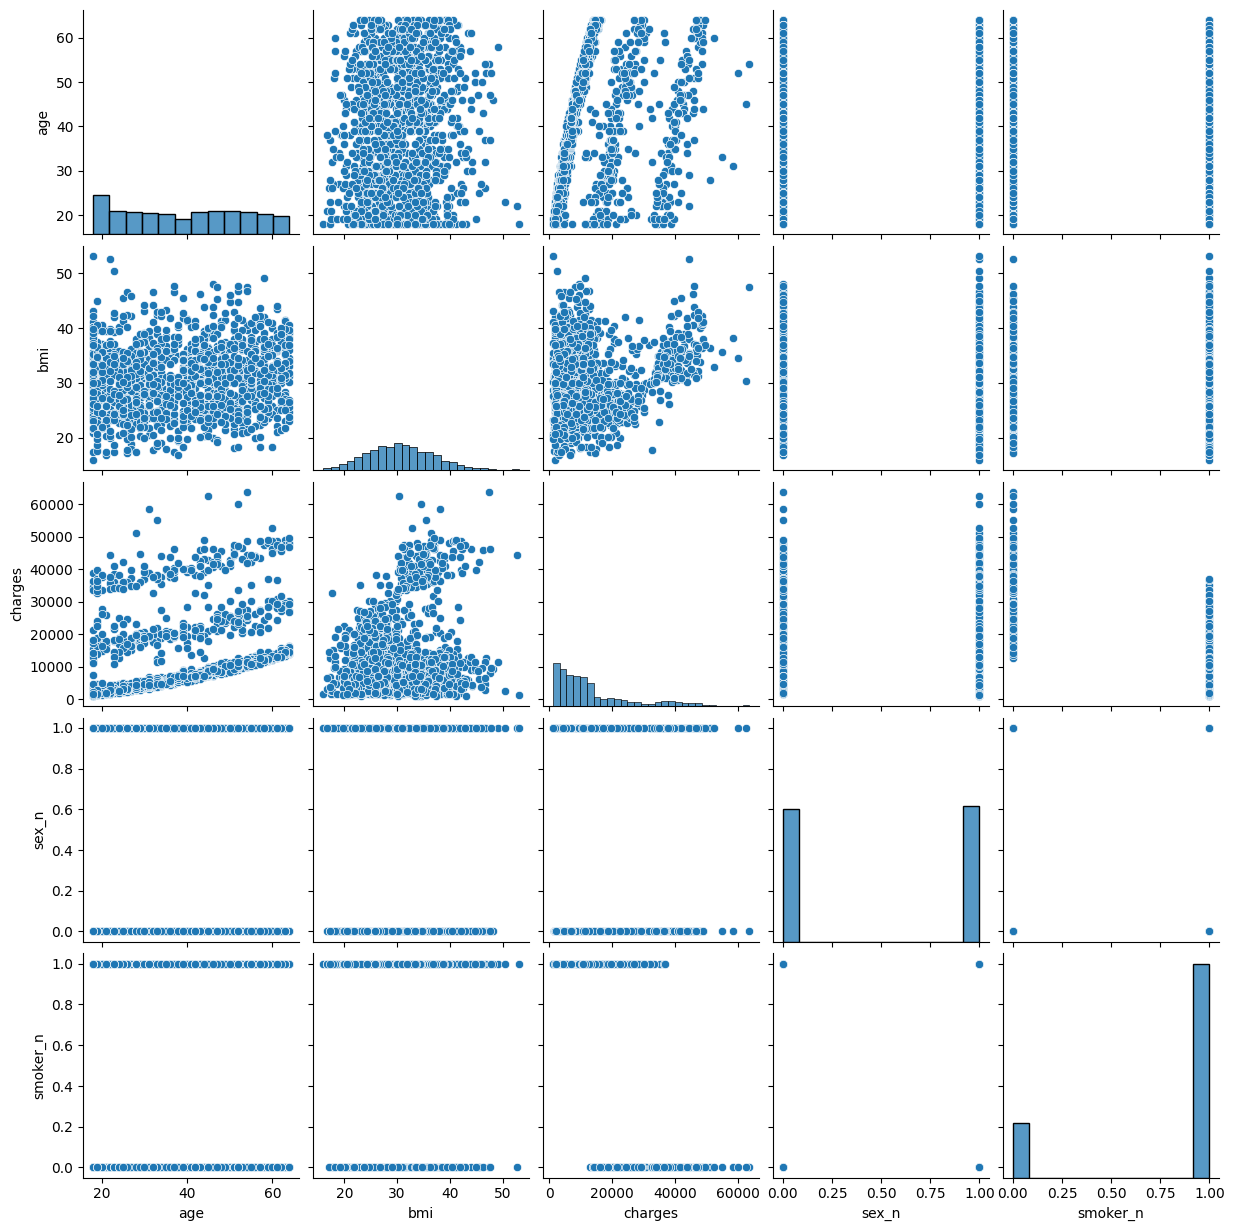

In [34]:
#Analisis de todos los datos 

sns.pairplot(data = data)